In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [3]:
data.shape

(150902, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150902 entries, 2019-11-01 00:00:00 to 2022-05-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fremont Bridge Total          150879 non-null  float64
 1   Fremont Bridge East Sidewalk  150879 non-null  float64
 2   Fremont Bridge West Sidewalk  150878 non-null  float64
dtypes: float64(3)
memory usage: 4.6 MB


In [7]:
data.sample(2)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-02-15 05:00:00,20.0,9.0,11.0
2013-10-03 05:00:00,26.0,18.0,8.0


### Q1) See the summary statistics of the DataFrame by dropping nan values <font color='Blue'> (15 points) </font>

In [5]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,150878.000000,150878.000000,150878.000000
mean,109.454539,49.594885,59.859655
std,139.444543,64.153845,86.599269
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


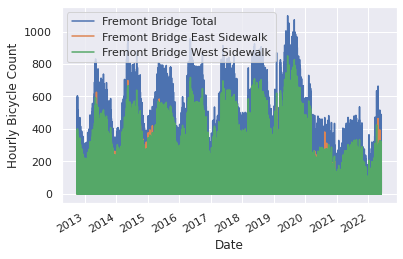

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

### Q2) Gain more insight: Resample by Month <font color='Blue'> (20 points) </font>

In [9]:
data.resample('M').mean()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
...,...,...,...
2022-01-31,46.123656,19.245968,26.877688
2022-02-28,57.404762,23.660714,33.744048
2022-03-31,75.874832,30.584118,45.290713


__Discussion 5:__ Consider the Figure by discussing the seasonal trends. What do you think about the decrease in 2020 ans so on? Write your discussion on the discussioon board! __(10 pnts)__

### Q3)Resample the DataFrame in days. After that, see mean 6 months (~180 days) rolling mean of the data, making sure to center the window <font color='Blue'> (20 points) </font>

In [11]:
data.resample('D').mean()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,146.708333,73.333333,73.375000
2012-10-04,144.791667,71.166667,73.625000
2012-10-05,131.166667,64.916667,66.250000
2012-10-06,83.583333,45.000000,38.583333
2012-10-07,89.250000,49.625000,39.625000
...,...,...,...
2022-05-27,103.583333,42.000000,61.583333
2022-05-28,49.250000,19.875000,29.375000
2022-05-29,30.541667,11.166667,19.375000


In [12]:
data.rolling(window=180).mean().dropna()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-08 11:00:00,149.511111,53.238889,96.272222
2019-11-08 12:00:00,150.072222,53.544444,96.527778
2019-11-08 13:00:00,150.811111,53.811111,97.000000
2019-11-08 14:00:00,151.838889,54.205556,97.633333
2019-11-08 15:00:00,153.322222,54.644444,98.677778
...,...,...,...
2022-05-31 19:00:00,100.088889,39.533333,60.555556
2022-05-31 20:00:00,99.033333,39.077778,59.955556
2022-05-31 21:00:00,98.355556,38.850000,59.505556


### Q4) Use the np.where() function to distinguish weekends and weekdays. Describe a new column to the DataFrame by assigning weekends as 0 and weekdays as 1. <font color='Blue'> (20 points) </font>

_Example_
![assignment4_1.png](attachment:assignment4_1.png)

In [14]:
import numpy as np
data['Weekend'] = np.where(data.index.dayofweek < 5, 1, 0)


In [17]:
data.sample(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Weekend
Date,,,,
2019-06-10 22:00:00,48.0,15.0,33.0,1
2018-11-30 08:00:00,435.0,201.0,234.0,1
2018-08-08 23:00:00,47.0,20.0,27.0,1
2020-03-12 11:00:00,39.0,17.0,22.0,1
2021-04-02 10:00:00,72.0,38.0,34.0,1
2018-01-19 13:00:00,60.0,28.0,32.0,1
2020-01-31 13:00:00,32.0,13.0,19.0,1
2016-11-06 01:00:00,14.0,2.0,12.0,0
2018-01-20 09:00:00,57.0,37.0,20.0,0


### Q5) Use the np.where() function to distinguish weekends and weekdays. Describe a new column to the DataFrame by showing each index as 'weekday' or 'weekend' <font color='Blue'> (15 points) </font>

In [18]:
data['Day'] = np.where(data.index.dayofweek < 5, 'weekday', 'weekend')


In [19]:
data.sample(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Weekend,Day
Date,,,,,
2015-03-05 07:00:00,199.0,184.0,15.0,1,weekday
2015-08-15 17:00:00,166.0,84.0,82.0,0,weekend
2013-09-18 15:00:00,147.0,63.0,84.0,1,weekday
2014-02-15 07:00:00,13.0,6.0,7.0,0,weekend
2018-10-26 12:00:00,59.0,27.0,32.0,1,weekday
2017-12-18 00:00:00,1.0,1.0,0.0,1,weekday
2017-03-29 05:00:00,19.0,12.0,7.0,1,weekday
2020-04-10 20:00:00,52.0,22.0,30.0,1,weekday
2015-02-04 07:00:00,195.0,183.0,12.0,1,weekday


### Q6) Construct a multi-indexed data frame by indexing 'Weekend' and 'index of our DataFrame'

In [20]:
data.set_index(['Weekend', data.index], inplace=True)


In [21]:
data.sample(10)

Fremont Bridge Total  \
Weekend Date                                        
1       2014-02-03 18:00:00                 260.0   
        2015-10-21 00:00:00                  11.0   
        2022-01-24 23:00:00                   9.0   
0       2014-03-30 13:00:00                 128.0   
1       2017-08-01 14:00:00                 105.0   
        2019-12-05 20:00:00                  86.0   
0       2016-03-20 08:00:00                  32.0   
1       2015-07-14 23:00:00                  34.0   
        2019-10-28 12:00:00                 104.0   
        2014-12-05 09:00:00                 177.0   

                             Fremont Bridge East Sidewalk  \
Weekend Date                                                
1       2014-02-03 18:00:00                          82.0   
        2015-10-21 00:00:00                           6.0   
        2022-01-24 23:00:00                           4.0   
0       2014-03-30 13:00:00                          83.0   
1       2017-08-01 14:00:00                          46.0   
        2019-12-05 20:00:00                          24.0   
0       2016-03-20 08:00:00                          19.0   
1       2015-07-14 23:00:00                          20.0   
        2019-10-28 12:00:00                          41.0   
        2014-12-05 09:00:00                         117.0   

                             Fremont Bridge West Sidewalk      Day  
Weekend Date                                                        
1       2014-02-03 18:00:00                         178.0  weekday  
        2015-10-21 00:00:00                           5.0  weekday  
        2022-01-24 23:00:00                           5.0  weekday  
0       2014-03-30 13:00:00                          45.0  weekend  
1       2017-08-01 14:00:00                          59.0  weekday  
        2019-12-05 20:00:00                          62.0  weekday  
0       2016-03-20 08:00:00                          13.0  weekend  
1       2015-07-14 23:00:00                          14.0  weekday  
        2019-10-28 12:00:00                          63.0  weekday  
        2014-12-05 09:00:00                          60.0  weekday

In [22]:
data.loc[(1, slice(None)), :]


Fremont Bridge Total  \
Weekend Date                                        
1       2019-11-01 00:00:00                  12.0   
        2019-11-01 01:00:00                   7.0   
        2019-11-01 02:00:00                   1.0   
        2019-11-01 03:00:00                   6.0   
        2019-11-01 04:00:00                   6.0   
...                                           ...   
        2022-05-31 19:00:00                 213.0   
        2022-05-31 20:00:00                 159.0   
        2022-05-31 21:00:00                  81.0   
        2022-05-31 22:00:00                  24.0   
        2022-05-31 23:00:00                  14.0   

                             Fremont Bridge East Sidewalk  \
Weekend Date                                                
1       2019-11-01 00:00:00                           7.0   
        2019-11-01 01:00:00                           0.0   
        2019-11-01 02:00:00                           0.0   
        2019-11-01 03:00:00                           6.0   
        2019-11-01 04:00:00                           5.0   
...                                                   ...   
        2022-05-31 19:00:00                          82.0   
        2022-05-31 20:00:00                          66.0   
        2022-05-31 21:00:00                          38.0   
        2022-05-31 22:00:00                          10.0   
        2022-05-31 23:00:00                           8.0   

                             Fremont Bridge West Sidewalk      Day  
Weekend Date                                                        
1       2019-11-01 00:00:00                           5.0  weekday  
        2019-11-01 01:00:00                           7.0  weekday  
        2019-11-01 02:00:00                           1.0  weekday  
        2019-11-01 03:00:00                           0.0  weekday  
        2019-11-01 04:00:00                           1.0  weekday  
...                                                   ...      ...  
        2022-05-31 19:00:00                         131.0  weekday  
        2022-05-31 20:00:00                          93.0  weekday  
        2022-05-31 21:00:00                          43.0  weekday  
        2022-05-31 22:00:00                          14.0  weekday  
        2022-05-31 23:00:00                           6.0  weekday  

[107822 rows x 4 columns]

In [23]:
data

Fremont Bridge Total  \
Weekend Date                                        
1       2019-11-01 00:00:00                  12.0   
        2019-11-01 01:00:00                   7.0   
        2019-11-01 02:00:00                   1.0   
        2019-11-01 03:00:00                   6.0   
        2019-11-01 04:00:00                   6.0   
...                                           ...   
        2022-05-31 19:00:00                 213.0   
        2022-05-31 20:00:00                 159.0   
        2022-05-31 21:00:00                  81.0   
        2022-05-31 22:00:00                  24.0   
        2022-05-31 23:00:00                  14.0   

                             Fremont Bridge East Sidewalk  \
Weekend Date                                                
1       2019-11-01 00:00:00                           7.0   
        2019-11-01 01:00:00                           0.0   
        2019-11-01 02:00:00                           0.0   
        2019-11-01 03:00:00                           6.0   
        2019-11-01 04:00:00                           5.0   
...                                                   ...   
        2022-05-31 19:00:00                          82.0   
        2022-05-31 20:00:00                          66.0   
        2022-05-31 21:00:00                          38.0   
        2022-05-31 22:00:00                          10.0   
        2022-05-31 23:00:00                           8.0   

                             Fremont Bridge West Sidewalk      Day  
Weekend Date                                                        
1       2019-11-01 00:00:00                           5.0  weekday  
        2019-11-01 01:00:00                           7.0  weekday  
        2019-11-01 02:00:00                           1.0  weekday  
        2019-11-01 03:00:00                           0.0  weekday  
        2019-11-01 04:00:00                           1.0  weekday  
...                                                   ...      ...  
        2022-05-31 19:00:00                         131.0  weekday  
        2022-05-31 20:00:00                          93.0  weekday  
        2022-05-31 21:00:00                          43.0  weekday  
        2022-05-31 22:00:00                          14.0  weekday  
        2022-05-31 23:00:00                           6.0  weekday  

[150902 rows x 4 columns]